# Explore Cofffee

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [29]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
# import data
coffee_data= pd.read_csv("../data/crop/coffee_output.csv")

In [4]:
# TODO: view first 5 rows of your data
coffee_data.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0


In [5]:
# TODO: describe your numeric columns
coffee_data.describe()

,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
count,114.000000,114.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,8.812281,2012.552632,994.495413,5646.926606,298.055046,2146.513761,2639.027523,3345.082569
std,9.051550,6.265642,310.338484,372.684151,97.572559,96.699000,245.497999,175.124513
min,0.500000,2002.000000,466.000000,4465.000000,148.000000,2010.000000,2106.000000,3030.000000
25%,2.600000,2007.000000,679.000000,5640.000000,205.000000,2070.000000,2552.000000,3191.000000
50%,4.750000,2013.000000,1050.000000,5735.000000,307.000000,2135.000000,2679.000000,3415.000000
75%,12.175000,2018.000000,1185.000000,5810.000000,347.000000,2223.000000,2786.000000,3483.000000
max,34.800000,2023.000000,1510.000000,6200.000000,495.000000,2360.000000,3020.000000,3578.000000


In [6]:
# TODO: display the null values in your dataframe
coffee_data.isnull().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                5
bearing_trees                   5
nonbear_hectares                5
bearing_hectares                5
bearing_trees_per_hectare       5
nonbearing_trees_per_hectare    5
dtype: int64

In [7]:
# TODO: drop your null values
coffee_data.dropna(inplace=True)


In [8]:
# TODO: Select only Minas Gerais

minas_coffee = coffee_data[coffee_data['subdivision'] == 'Minas Gerais']

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

The analysis of bearing coffee trees in Minas Gerais over the years presents some conflicting insights. The line plot with the fitted regression line suggests a slight increase in the average number of bearing trees over time. However, the calculated slope from the linear regression is negative, which typically indicates a decreasing trend. This inconsistency might be due to fluctuations or irregularities in the data, such as outliers or uneven distribution of data points across years.

Regarding the distribution of the bearing trees, the histogram shows that the data is right-skewed and not normally distributed, which is common in agricultural production data where some years or farms may have much higher yields than others.

Given these observations, it is important to treat the trend conclusions with caution. Further analysis, such as examining data quality, considering non-linear trends, or using robust statistical methods, would be needed to clarify the true direction and strength of the trend in bearing coffee trees in Minas Gerais.



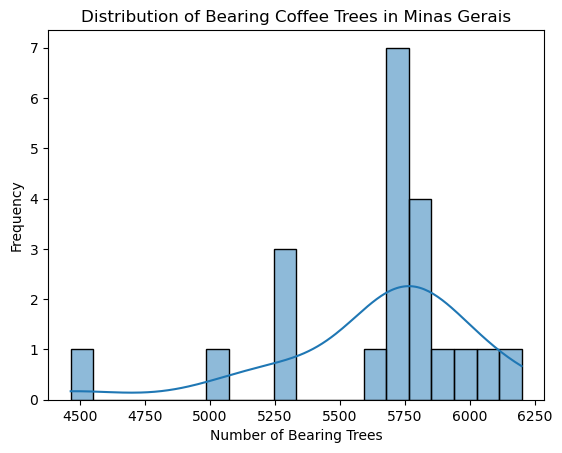

Slope: -86736.50167317294, Intercept: 45.9076965978804


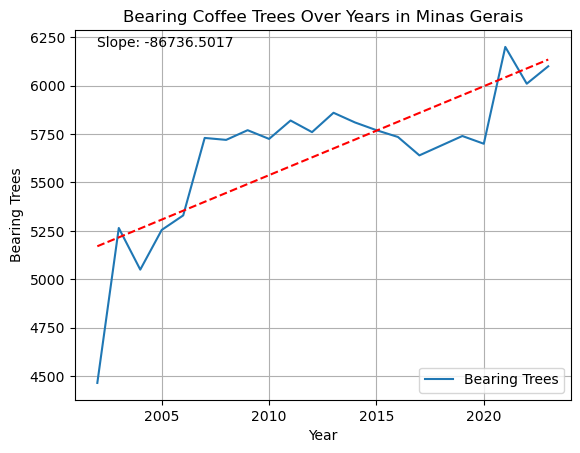

In [16]:
# Histogram to show the distribution of bearing trees in Minas Gerais
sns.histplot(data=minas_coffee, x='bearing_trees', kde=True, bins=20)
plt.title('Distribution of Bearing Coffee Trees in Minas Gerais')
plt.xlabel('Number of Bearing Trees')
plt.ylabel('Frequency')
plt.show()

# Line plot to show the trend of coffee production over the years in Minas Gerais
# Group by year and calculate the mean number of bearing trees
bearing_trees_by_year = minas_coffee.groupby('year')['bearing_trees'].mean().reset_index()

# Trendline
z = np.polyfit(bearing_trees_by_year['year'], bearing_trees_by_year['bearing_trees'], 1)
p = np.poly1d(z)
slope = p[0]
intercept = p[1]
print(f"Slope: {slope}, Intercept: {intercept}")

# Create the plot
sns.lineplot(data=bearing_trees_by_year, x='year', y='bearing_trees', label='Bearing Trees')
plt.plot(bearing_trees_by_year['year'], p(bearing_trees_by_year['year']), color='red', linestyle='--')

plt.title('Bearing Coffee Trees Over Years in Minas Gerais')
plt.xlabel('Year')
plt.ylabel('Bearing Trees')
plt.text(x=bearing_trees_by_year['year'].min(), 
         y=bearing_trees_by_year['bearing_trees'].max(), 
         s=f"Slope: {slope:.4f}")
plt.grid(True)
plt.show()

How is bearing hectares changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

The histogram shows that most of the bearing hectares values in Minas Gerais are higher, with fewer small values, meaning the data is skewed to the left. When looking at the line plot over the years, the slope number suggests an increase, but the line itself looks like it’s going downward, which leads me to believe there might be some  errors that need more checking  or further analysis.

To get a better idea of the data’s spread, I also made a box plot. This box plot shows that the middle value (median) is closer to the higher end, which matches the left-skew in the histogram. The range between the middle 50% of the data is quite large, meaning there’s a lot of variation in bearing hectares. There are also some unusually low values (outliers) shown below the main range, which could be affecting the trend we see.

Putting all this together, it seems like bearing hectares might be going down over time, but because the data isn’t evenly spread and has some odd values, a simple line might not tell the full story. More detailed analysis would help to understand what’s really happening.

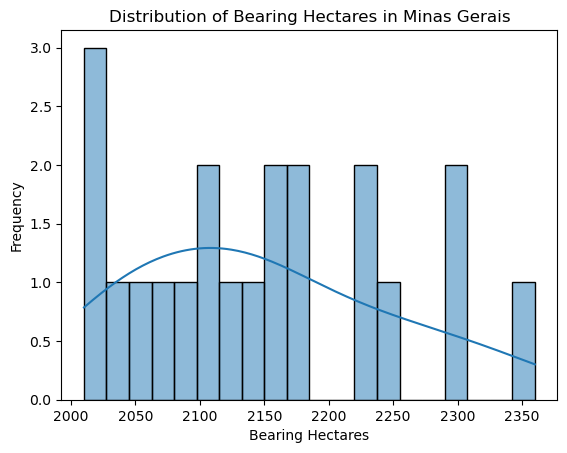

Slope: 27637.284272169447, Intercept: -12.66765197992187


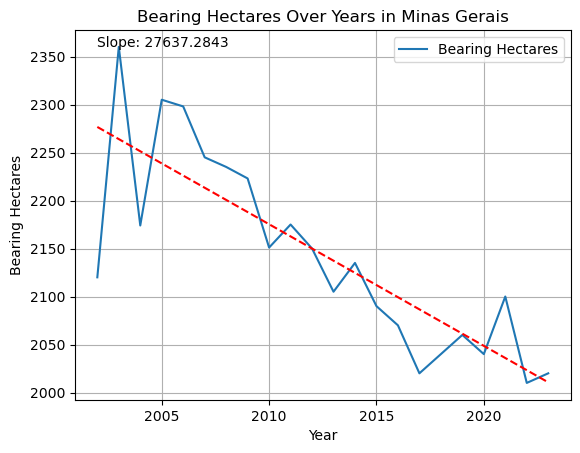

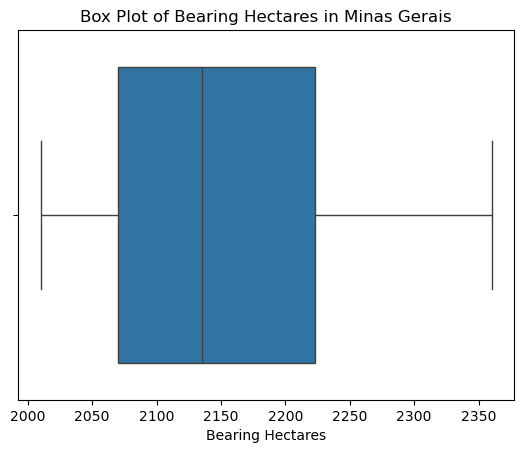

In [22]:
# Histogram for distribution of bearing hectares
sns.histplot(data=minas_coffee, x='bearing_hectares', kde=True, bins=20)
plt.title('Distribution of Bearing Hectares in Minas Gerais')
plt.xlabel('Bearing Hectares')
plt.ylabel('Frequency')
plt.show()

# Group by year and calculate mean bearing hectares
bearing_hectares_by_year = minas_coffee.groupby('year')['bearing_hectares'].mean().reset_index()

# Fit linear trendline
z = np.polyfit(bearing_hectares_by_year['year'], bearing_hectares_by_year['bearing_hectares'], 1)
p = np.poly1d(z)
slope = p[0]
intercept = p[1]
print(f"Slope: {slope}, Intercept: {intercept}")

# Plot line plot with regression line
sns.lineplot(data=bearing_hectares_by_year, x='year', y='bearing_hectares', label='Bearing Hectares')
plt.plot(bearing_hectares_by_year['year'], p(bearing_hectares_by_year['year']), color='red', linestyle='--')
plt.title('Bearing Hectares Over Years in Minas Gerais')
plt.xlabel('Year')
plt.ylabel('Bearing Hectares')
plt.legend()
plt.text(x=bearing_hectares_by_year['year'].min(), 
         y=bearing_hectares_by_year['bearing_hectares'].max(), 
         s=f"Slope: {slope:.4f}")
plt.grid(True)
plt.show()

### Box Plot
sns.boxplot(data=minas_coffee, x='bearing_hectares')
plt.title('Box Plot of Bearing Hectares in Minas Gerais')
plt.xlabel('Bearing Hectares')
plt.show()



How is the count of million 60kgs bags of coffee changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

The distribution of the count of million 60kg bags of coffee produced in Minas Gerais appears to be normal, based on the histogram and box plot. The histogram shows a fairly symmetric shape without strong skewness, and the box plot supports this by showing a balanced spread of data with no extreme outliers.

Regarding the trend over the years, the slope calculated from the line plot is negative (about -1263), indicating a slight overall decrease in production. However, the production values fluctuate from year to year, as seen in the box plot, which suggests some variability around this trend.

In all, the production data is roughly normally distributed and shows a slight downward trend over time, but with some yearly variation.

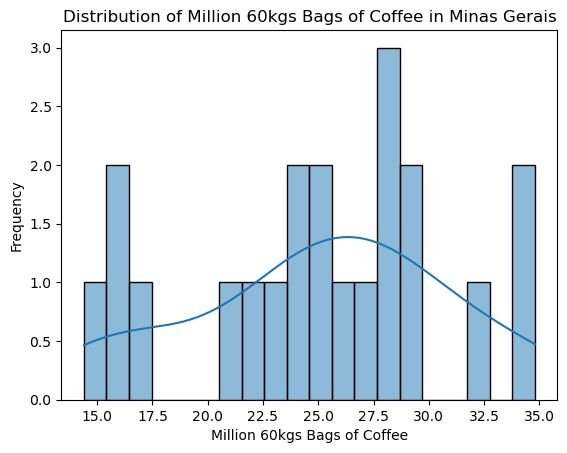

Slope: -1263.6266229782545


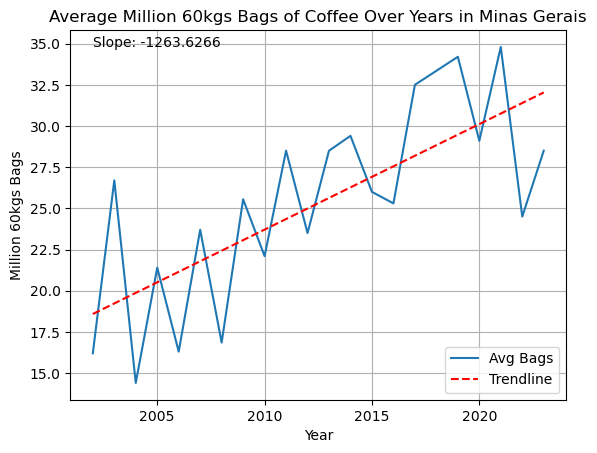

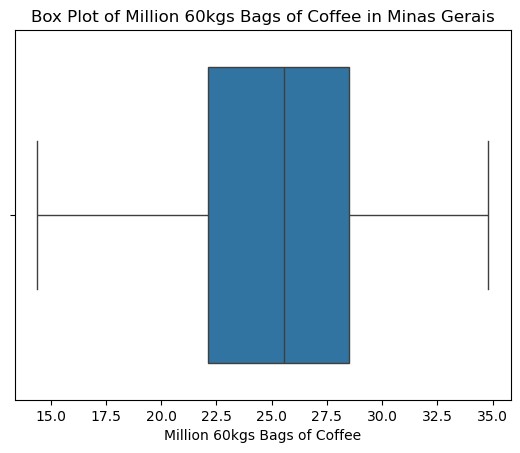

In [27]:
# Histogram to show the distribution
sns.histplot(data=minas_coffee, x='60kgs_bag', kde=True, bins=20)
plt.title('Distribution of Million 60kgs Bags of Coffee in Minas Gerais')
plt.xlabel('Million 60kgs Bags of Coffee')
plt.ylabel('Frequency')
plt.show()

# Group by year and calculate the mean number of coffee bags
bags_by_year = minas_coffee.groupby('year')['60kgs_bag'].mean().reset_index()

# Calculate trendline
z = np.polyfit(bags_by_year['year'], bags_by_year['60kgs_bag'], 1)
p = np.poly1d(z)
slope = p[0]
print(f"Slope: {slope}")

# Line plot showing trend over the years
sns.lineplot(data=bags_by_year, x='year', y='60kgs_bag', label='Avg Bags')
plt.plot(bags_by_year['year'], p(bags_by_year['year']), color='red', linestyle='--', label='Trendline')
plt.title('Average Million 60kgs Bags of Coffee Over Years in Minas Gerais')
plt.xlabel('Year')
plt.ylabel('Million 60kgs Bags')
plt.legend()
plt.text(x=bags_by_year['year'].min(), y=bags_by_year['60kgs_bag'].max(),
         s=f"Slope: {slope:.4f}")
plt.grid(True)
plt.show()

# Box Plot
sns.boxplot(data=minas_coffee, x='60kgs_bag')
plt.title('Box Plot of Million 60kgs Bags of Coffee in Minas Gerais')
plt.xlabel('Million 60kgs Bags of Coffee')
plt.show()


What is the relationship between bearing_trees and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

 The Pearson correlation coefficient is 0.6553, and the p-value is 0.0013, which means the relationship is statistically significant. This shows a moderate to strong positive correlation. In simple terms, as the number of bearing trees increases, coffee production also tends to increase.

Pearson correlation coefficient: 0.6553, p-value: 0.0013
There is a statistically significant correlation between the number of bearing trees and the number of 60kg coffee bags.


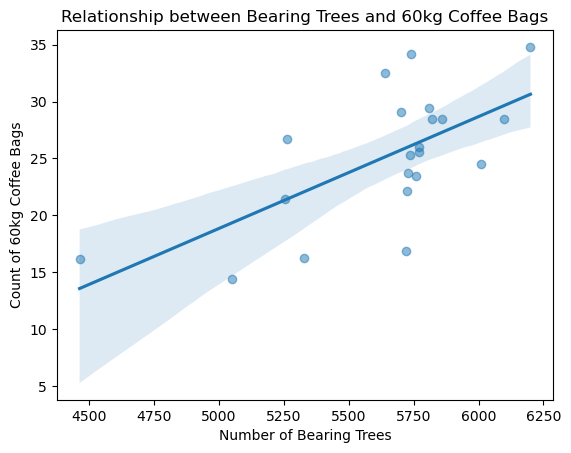

In [ ]:
# Calculate Pearson correlation coefficient and p-value
pearsonr_corr, p_value = pearsonr(minas_coffee['bearing_trees'], minas_coffee['60kgs_bag'])

# Display the results
print(f"Pearson correlation coefficient: {pearsonr_corr:.4f}, p-value: {p_value:.4f}")   

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant correlation between the number of bearing trees and the number of 60kg coffee bags.")
else:
    print("There is no statistically significant correlation between the number of bearing trees and the number of 60kg coffee bags.")

# Scatter plot with regression line
sns.regplot(x='bearing_trees', y='60kgs_bag', data=minas_coffee, scatter_kws={'alpha':0.5})
plt.title('Relationship between Bearing Trees and 60kg Coffee Bags')
plt.xlabel('Number of Bearing Trees')
plt.ylabel('Count of 60kg Coffee Bags')
plt.show()

What is the relationship between bearing_hectares and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

There is a moderate negative correlation between bearing hectares and the number of 60kg coffee bags, with a Pearson correlation coefficient of -0.4809. This means that as the number of bearing hectares increases, the number of 60kg bags tends to decrease. The p-value of 0.0273 indicates that this correlation is statistically significant, so the relationship is unlikely to be due to chance. 

Pearson correlation coefficient: -0.4809, p-value: 0.0273
There is a statistically significant correlation between the number of bearing hectares and the number of 60kg coffee bags.


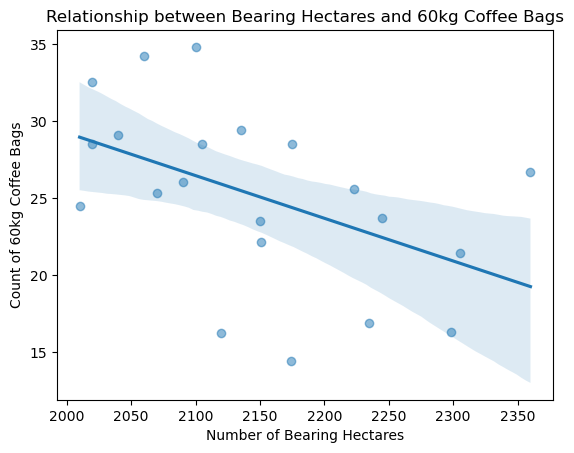

In [34]:
# Calculate the Pearson correlation coefficient and p-value
pearsonr_corr, p_value = pearsonr(minas_coffee['bearing_hectares'], minas_coffee['60kgs_bag'])

# Display the results
print(f"Pearson correlation coefficient: {pearsonr_corr:.4f}, p-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant correlation between the number of bearing hectares and the number of 60kg coffee bags.")
else:
    print("There is no statistically significant correlation between the number of bearing hectares and the number of 60kg coffee bags.")

# Scatter plot with regression line
sns.regplot(x='bearing_hectares', y='60kgs_bag', data=minas_coffee, scatter_kws={'alpha':0.5})
plt.title('Relationship between Bearing Hectares and 60kg Coffee Bags')
plt.xlabel('Number of Bearing Hectares')
plt.ylabel('Count of 60kg Coffee Bags')
plt.show()



Final Remarks: 

The purpose of this analysis was to explore how coffee production in Minas Gerais, Brazil, has changed over time by examining trends and distributions of key variables: bearing trees, bearing hectares, and the number of 60kg coffee bags produced. We used histograms, box plots, and line plots to observe how each variable was distributed and how they changed across different years. Understanding the distribution helped identify patterns such as skewness or outliers, which are important for accurate interpretation. Pearson’s correlation coefficient was also used to examine the strength of relationships between variables. This analysis is significant because it provides insights into how land use and tree production may affect coffee output over time. These insights can help inform decisions in agriculture and production planning. However, some limitations include potential data inconsistencies and confusing trends, such as line plots showing upward movement despite negative slope values. Also, while we found statistically significant correlations, this does not confirm causation. Further analysis would be needed to explore the underlying factors driving these patterns.

